In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

data = pd.read_csv('D:\Институт\Семестр_6\ТМО_Гапанюк\лабы\covid-19-canada.csv')
data.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired,case_source
0,NaN,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25,2020-01-19,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
1,NaN,2,50-59,Female,Toronto,Ontario,Canada,2020-01-27,2020-01-26,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
2,NaN,1,40-49,Male,Vancouver Coastal,BC,Canada,2020-01-28,2020-01-26,t,NaN,https://news.gov.bc.ca/releases/2020HLTH0015-0...
3,NaN,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31,2020-01-26,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
4,NaN,2,50-59,Female,Vancouver Coastal,BC,Canada,2020-02-04,2020-02-02,f,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...


In [2]:
data.shape # Размер данных

(50982, 12)

In [3]:
data.dtypes # Список колонок с типами данных

case_id               float64
provincial_case_id      int64
age                    object
sex                    object
health_region          object
province               object
country                object
date_report            object
report_week            object
has_travel_history     object
locally_acquired       object
case_source            object
dtype: object

In [5]:
data.isnull().sum() #проверка пропущенных значений

case_id               50982
provincial_case_id        0
age                       0
sex                       0
health_region             0
province                  0
country                   0
date_report               0
report_week               0
has_travel_history    49832
locally_acquired      50408
case_source               0
dtype: int64

Колонка case_id не содержит ни одного значения

In [8]:
# Удаление колонок, содержащих пустые значения
data_new = data.dropna(axis=1, how='all')
(data.shape, data_new.shape)

((50982, 12), (50982, 11))

In [9]:
data_new.isnull().sum() #проверка пропущенных значений

provincial_case_id        0
age                       0
sex                       0
health_region             0
province                  0
country                   0
date_report               0
report_week               0
has_travel_history    49832
locally_acquired      50408
case_source               0
dtype: int64

In [18]:
total_count = data.shape[0]
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка case_id. Тип данных float64. Количество пустых значений 50982, 100.0%.


In [22]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка has_travel_history. Тип данных object. Количество пустых значений 49832, 97.74%.
Колонка locally_acquired. Тип данных object. Количество пустых значений 50408, 98.87%.


In [37]:
cat_temp_data = data[['has_travel_history']]
cat_temp_data.head()

,has_travel_history
0,t
1,t
2,t
3,t
4,f


In [38]:
cat_temp_data['has_travel_history'].unique()

array(['t', 'f', nan], dtype=object)

In [39]:
flt_index = data[data['has_travel_history'].isnull()].index
flt_index

Int64Index([  155,   170,   171,   172,   173,   174,   196,   197,   198,
              199,
            ...
            50972, 50973, 50974, 50975, 50976, 50977, 50978, 50979, 50980,
            50981],
           dtype='int64', length=49832)

In [41]:
data[data.index.isin(flt_index)].head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired,case_source
155,NaN,60,Not Reported,Not Reported,York,Ontario,Canada,2020-03-13,2020-03-08,NaN,NaN,https://www.ontario.ca/page/2019-novel-coronav...
170,NaN,75,Not Reported,Not Reported,Toronto,Ontario,Canada,2020-03-13,2020-03-08,NaN,NaN,https://www.ontario.ca/page/2019-novel-coronav...
171,NaN,76,Not Reported,Not Reported,Toronto,Ontario,Canada,2020-03-13,2020-03-08,NaN,NaN,https://www.ontario.ca/page/2019-novel-coronav...
172,NaN,77,Not Reported,Not Reported,Toronto,Ontario,Canada,2020-03-13,2020-03-08,NaN,NaN,https://www.ontario.ca/page/2019-novel-coronav...
173,NaN,78,Not Reported,Not Reported,Toronto,Ontario,Canada,2020-03-13,2020-03-08,NaN,NaN,https://www.ontario.ca/page/2019-novel-coronav...


In [42]:
# Импьютация константой
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='f')
data_imp = imp.fit_transform(cat_temp_data)
data_imp

array([['t'],
       ['t'],
       ['t'],
       ...,
       ['f'],
       ['f'],
       ['f']], dtype=object)

In [43]:
np.unique(data_imp)

array(['f', 't'], dtype=object)

In [45]:
data['locally_acquired'].unique()

array([nan, 'Close Contact', 'Community', 'Close contact',
       'close contact'], dtype=object)

In [49]:
cat_enc = pd.DataFrame({'c1':data_imp.T[0]})
cat_enc

,c1
0,t
1,t
2,t
3,t
4,f
...,...
50977,f
50978,f
50979,f
50980,f


In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])
cat_enc['c1'].unique()

array(['t', 'f'], dtype=object)

In [51]:
np.unique(cat_enc_le)

array([0, 1])

In [52]:
le.inverse_transform([0, 1])

array(['f', 't'], dtype=object)

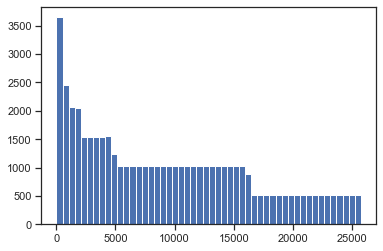

In [58]:
from sklearn.preprocessing import MinMaxScaler

sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['provincial_case_id']])

plt.hist(data['provincial_case_id'], 50)
plt.show()

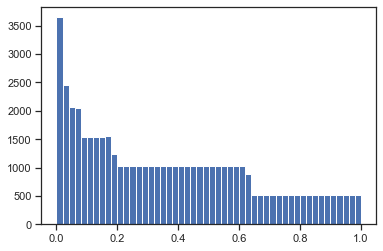

In [56]:
plt.hist(sc1_data, 50)
plt.show()